## K-Means 
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import my_utils as my

#### 데이터 준비

In [4]:
from sklearn.datasets import make_blobs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

x_data, y_data = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.5, random_state=1)

In [7]:
print(type(x_data), type(y_data), "\n\n")
print(x_data[:5])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 


[[ -7.62311719  -8.11276455]
 [ -6.85011911  -8.4567273 ]
 [ -6.81871391  -8.49356718]
 [-10.32117085  -3.5026051 ]
 [-10.01706026  -4.76123472]]


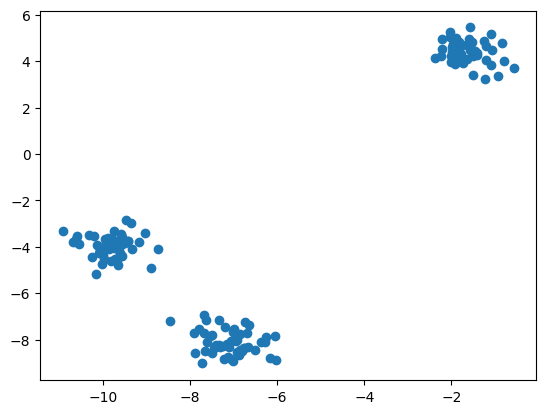

In [9]:
plt.scatter(x_data[:, 0], x_data[:, 1])
plt.show()

#### 학습

In [11]:
from sklearn.cluster import KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

km = KMeans(n_clusters=3, random_state=1)

In [12]:
km.fit(x_data)   # 비지도학습이므로 y가 없음

C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=1)

In [13]:
y_pred = km.predict(x_data)
y_pred

array([2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1])

In [16]:
df = pd.DataFrame(x_data, columns=["X_1", "X_2"])
df.head()

,X_1,X_2
0,-7.623117,-8.112765
1,-6.850119,-8.456727
2,-6.818714,-8.493567
3,-10.321171,-3.502605
4,-10.017060,-4.761235


In [17]:
df["y_pred"] = y_pred
df.head()

,X_1,X_2,y_pred
0,-7.623117,-8.112765,2
1,-6.850119,-8.456727,2
2,-6.818714,-8.493567,2
3,-10.321171,-3.502605,1
4,-10.017060,-4.761235,1


In [22]:
centroid = km.cluster_centers_

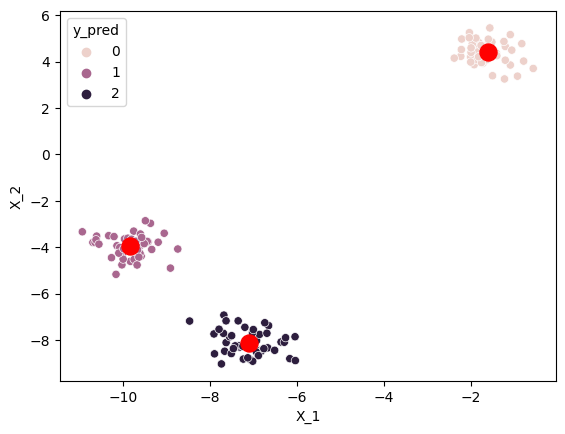

In [24]:
sns.scatterplot(data=df, x="X_1", y="X_2", hue="y_pred")
plt.scatter(centroid[:, 0], centroid[:, 1], s=150, marker="o", c="red")

#### elbow method

In [29]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x_data)
    inertia.append(km.inertia_)
    
print(inertia)

C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[685.2185823891538, 66.57228048195628, 56.014880180810394, 48.27019361661411, 41.88403362479957, 35.99835718692947, 31.009422008841376, 26.456971408781705, 24.115928050831144]


C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


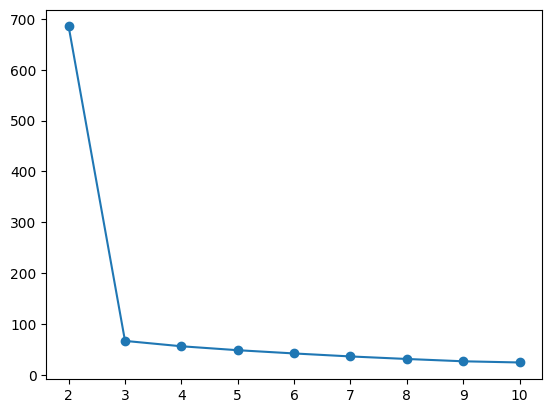

In [31]:
plt.plot(np.arange(2, 11), inertia, marker="o")
plt.show()

#### iris 데이터를 사용해서 KMeans

In [32]:
from sklearn import datasets

data = datasets.load_iris()

In [34]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [38]:
df = df.drop(["petal length (cm)"], axis=1)
df = df.drop(["petal width (cm)"], axis=1)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

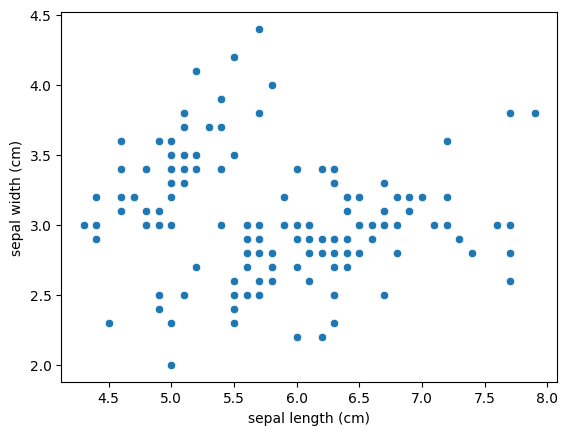

In [41]:
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)")

In [45]:
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(df)
    inertia.append(km.inertia_)
    
print(inertia)

C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[407.7177378169394, 214.29014811149594, 158.17898081729146, 104.3142652201741, 68.88982603866596, 51.90262499598104, 34.86324007534611, 18.930263884869923, 9.7486521632582]


C:\Users\021\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


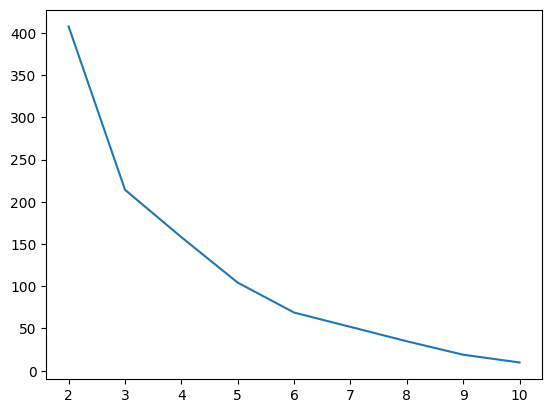

In [46]:
plt.plot(np.arange(2, 11), inertia)

In [47]:
y_pred = km.predict(df)
df["y_pred"] = y_pred

[[ 5.07600000e+00  3.50400000e+00 -1.77635684e-15]
 [ 6.14545455e+00  2.89090909e+00  8.00000000e+00]
 [ 5.62800000e+00  2.70400000e+00  5.00000000e+00]
 [ 6.61724138e+00  3.11724138e+00  1.00000000e+00]
 [ 4.90000000e+00  2.33333333e+00  2.00000000e+00]
 [ 4.67500000e+00  3.09375000e+00  9.00000000e+00]
 [ 7.43333333e+00  2.92222222e+00  7.00000000e+00]
 [ 5.51250000e+00  4.00000000e+00  6.00000000e+00]
 [ 7.60000000e+00  3.73333333e+00  4.00000000e+00]
 [ 6.25714286e+00  2.34285714e+00  3.00000000e+00]]


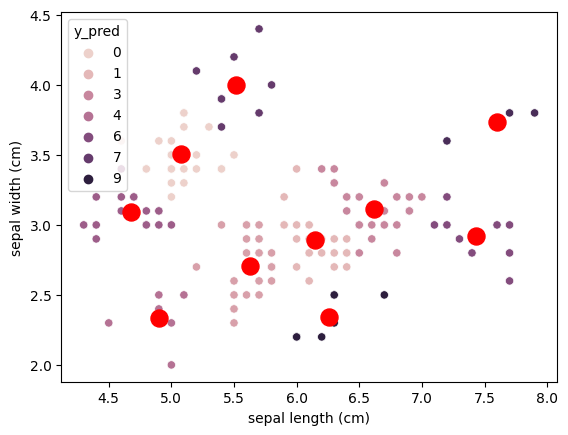

In [50]:
centroid = km.cluster_centers_
sns.scatterplot(data=df, x="sepal length (cm)", y="sepal width (cm)", hue="y_pred")
plt.scatter(centroid[:, 0], centroid[:, 1], s=150, marker="o", c="red")
print(centroid)